BIOS512 FINAL PROJECT BELLA WILLIAMS

In [2]:
library(readr)
library(tidyverse)
library(ggplot)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ purrr     1.0.1
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


ERROR: Error in library(ggplot): there is no package called ‘ggplot’


In [3]:
install.packages('fivethirtyeight') 
install.packages('fivethirtyeightdata', repos = 'https://fivethirtyeightdata.github.io/drat/', type = 'source')

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



In [4]:
library(fivethirtyeight)
data("airline_safety")

In [5]:
install.packages('readr')
library(readr)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



Part I: Preparing the Data

In [9]:
head(airline_safety)

airline,incl_reg_subsidiaries,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14
<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>
Aer Lingus,FALSE,320906734,2,0,0,0,0,0
Aeroflot,TRUE,1197672318,76,14,128,6,1,88
Aerolineas Argentinas,FALSE,385803648,6,0,0,1,0,0
Aeromexico,TRUE,596871813,3,1,64,5,0,0
Air Canada,FALSE,1865253802,2,0,0,2,0,0
Air France,FALSE,3004002661,14,4,79,6,2,337


In [7]:
str(airline_safety)

summary(airline_safety)

mean(airline_safety$fatalities_85_99)
mean(airline_safety$fatalities_00_14)

tibble [56 × 9] (S3: tbl_df/tbl/data.frame)
 $ airline               : chr [1:56] "Aer Lingus" "Aeroflot" "Aerolineas Argentinas" "Aeromexico" ...
 $ incl_reg_subsidiaries : logi [1:56] FALSE TRUE FALSE TRUE FALSE FALSE ...
 $ avail_seat_km_per_week: num [1:56] 3.21e+08 1.20e+09 3.86e+08 5.97e+08 1.87e+09 ...
 $ incidents_85_99       : int [1:56] 2 76 6 3 2 14 2 3 5 7 ...
 $ fatal_accidents_85_99 : int [1:56] 0 14 0 1 0 4 1 0 0 2 ...
 $ fatalities_85_99      : int [1:56] 0 128 0 64 0 79 329 0 0 50 ...
 $ incidents_00_14       : int [1:56] 0 6 1 5 2 6 4 5 5 4 ...
 $ fatal_accidents_00_14 : int [1:56] 0 1 0 0 0 2 1 1 1 0 ...
 $ fatalities_00_14      : int [1:56] 0 88 0 0 0 337 158 7 88 0 ...


   airline          incl_reg_subsidiaries avail_seat_km_per_week
 Length:56          Mode :logical         Min.   :2.594e+08     
 Class :character   FALSE:40              1st Qu.:4.740e+08     
 Mode  :character   TRUE :16              Median :8.029e+08     
                                          Mean   :1.385e+09     
                                          3rd Qu.:1.847e+09     
                                          Max.   :7.139e+09     
 incidents_85_99  fatal_accidents_85_99 fatalities_85_99 incidents_00_14 
 Min.   : 0.000   Min.   : 0.000        Min.   :  0.0    Min.   : 0.000  
 1st Qu.: 2.000   1st Qu.: 0.000        1st Qu.:  0.0    1st Qu.: 1.000  
 Median : 4.000   Median : 1.000        Median : 48.5    Median : 3.000  
 Mean   : 7.179   Mean   : 2.179        Mean   :112.4    Mean   : 4.125  
 3rd Qu.: 8.000   3rd Qu.: 3.000        3rd Qu.:184.2    3rd Qu.: 5.250  
 Max.   :76.000   Max.   :14.000        Max.   :535.0    Max.   :24.000  
 fatal_accidents_00_14 fata

[1] 112.4107

[1] 55.51786

- Checking Missingness

In [8]:
sum(is.na(airline_safety))
colSums(is.na(airline_safety))

[1] 0

airline  incl_reg_subsidiaries avail_seat_km_per_week 
                     0                      0                      0 
       incidents_85_99  fatal_accidents_85_99       fatalities_85_99 
                     0                      0                      0 
       incidents_00_14  fatal_accidents_00_14       fatalities_00_14 
                     0                      0                      0

- Checking Duplicates

In [11]:
nrow(airline_safety)               
nrow(distinct(airline_safety))

airline_safety %>%
  group_by(airline) %>%
  tally() %>%
  filter(n > 1)

[1] 56

[1] 56

airline,n
<chr>,<int>


In [13]:
airline_safety %>%
  group_by(incl_reg_subsidiaries) %>%   
  tally() %>%                        
  arrange(desc(n))

incl_reg_subsidiaries,n
<lgl>,<int>
FALSE,40
TRUE,16


Part II: Data Description (Codebook)

The airline_safety dataset contains safety records for 56 airlines from 1985–2014. The data were originally compiled by FiveThirtyEight and include operational exposure (airline size) and incident/fatality counts for two time periods. No missing values are present in this dataset.

| Variable                   | Type      | Description |
|---------------------------|-----------|-------------|
| airline                   | character | Airline name |
| incl_reg_subsidiaries     | logical   | TRUE if safety numbers include regional subsidiaries, otherwise FALSE |
| avail_seat_km_per_week    | numeric   | Airline size, measured as available seat–kilometers flown per week |
| incidents_85_99           | integer   | Total incidents from 1985–1999 |
| fatal_accidents_85_99     | integer   | Fatal accidents from 1985–1999 |
| fatalities_85_99          | integer   | Total fatalities from 1985–1999 |
| incidents_00_14           | integer   | Total incidents from 2000–2014 |
| fatal_accidents_00_14     | integer   | Fatal accidents from 2000–2014 |
| fatalities_00_14          | integer   | Total fatalities from 2000–2014 |


Part III: Data Analysis/Visualization

Question 1. Which airlines have the highest total number of incidents between 1985 and 2014, and what is the range of total incidents across all airlines?

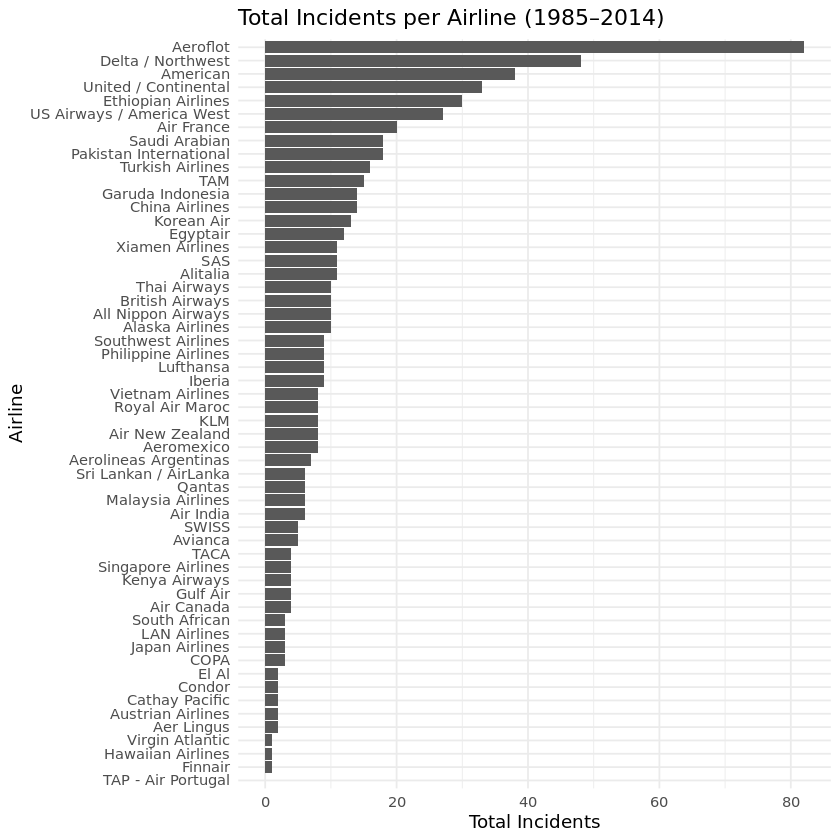

In [19]:
airline_safety$total_incidents <- airline_safety$incidents_85_99 +
                                  airline_safety$incidents_00_14

p3 <- ggplot(
    airline_safety,
    aes(x = reorder(airline, total_incidents), y = total_incidents)
) +
    geom_col() +
    coord_flip() +
    labs(
        title = "Total Incidents per Airline (1985–2014)",
        x = "Airline",
        y = "Total Incidents"
    ) +
    theme_minimal()

ggsave("plot3_total_incidents_bar.png", p3, width = 6, height = 6)

print(p3)

Figure 1. 

Conclusion: The bar chart of "Total Incidents per Airline (1985-2014)" shows that Aeroflot had the highest total number of incidents in the 30-year period. The next highest incidents belong to Delta/Northwest, American, and United/Continental. The total number of incidents across all 56 airlines ranges significantly, from a minimum of 0 for TAP - Air Portugal to the maximum value of 76 for Aeroflot.

Question 2. Is there a relationship between airline size and the number of incidents?

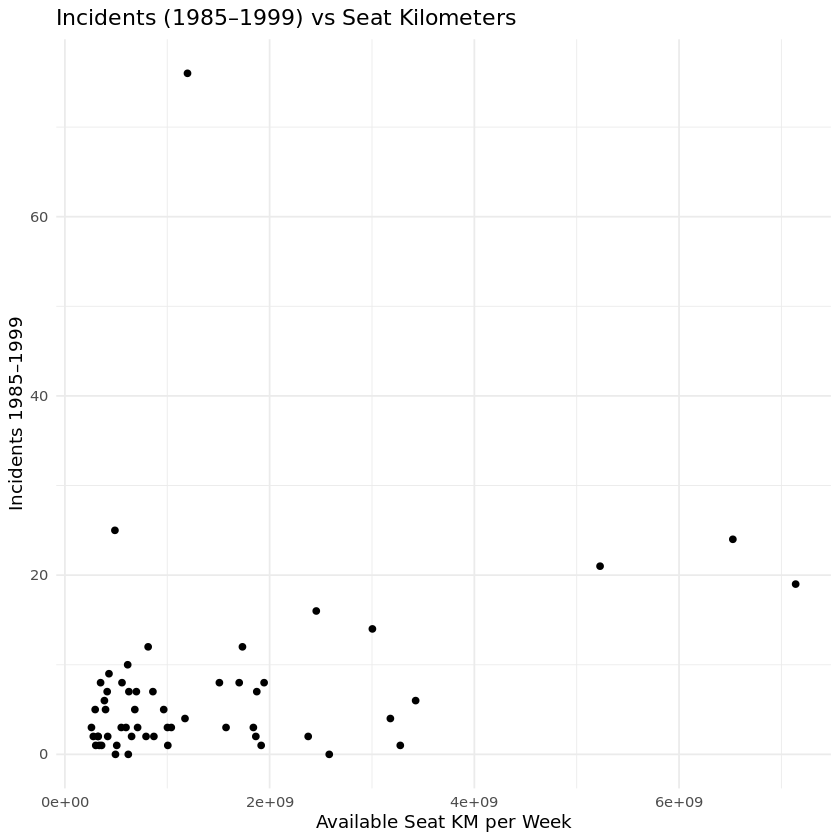

In [14]:
p1 <- ggplot(
     airline_safety,
     aes(x = avail_seat_km_per_week, y = incidents_85_99)
 ) +
     geom_point() +
     labs(
         title = "Incidents (1985–1999) vs Seat Kilometers",
         x = "Available Seat KM per Week",
         y = "Incidents 1985–1999"
     ) +
     theme_minimal()
 
 ggsave("plot1_incidents_vs_seats.png", p1, width = 6, height = 4)
 
 print(p1)

Figure 2. Scatter plot illustrating the relationship between Available Seat Kilometers per Week, a measure of airline size, and the number of Total Incidents recorded between 1985 and 1999. The data is heavily clustered in the lower-left corner, indicating that most airlines are smaller and have less than 20 incidents. A major outlier is visible with around 76 incidents and a moderate size of between 1e+09 and 2e+09 Available Seat KM per Week. There is a general, though weak, trend suggesting that larger airlines tend to have a higher total number of incidents compared to the smallest airlines.

In [1]:
ggplot(airline_safety, aes(x = avail_seat_km_per_week, y = incidents_00_14)) +
    geom_point() +
    labs(title = "Incidents (2000-2014) vs Seat Kilometers", x="Available Seat KM per Week", y="Incidents 2000-2014")


ERROR: Error in ggplot(airline_safety, aes(x = avail_seat_km_per_week, y = incidents_00_14)): could not find function "ggplot"


2.

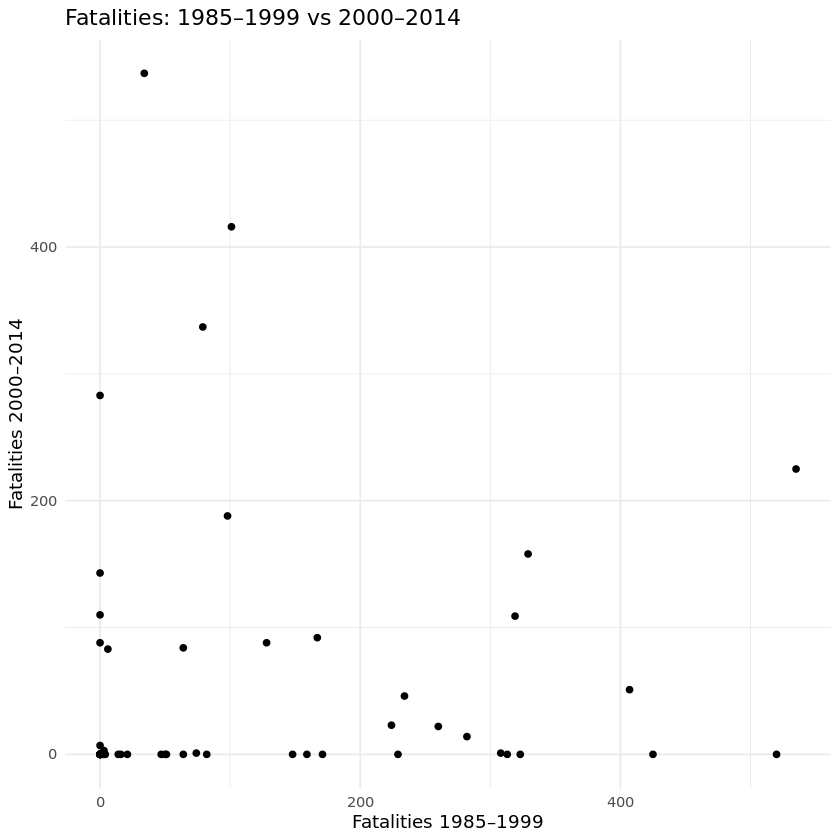

In [18]:
 p2 <- ggplot(
    airline_safety,
    aes(x = fatalities_85_99, y = fatalities_00_14)
) +
    geom_point() +
    labs(
        title = "Fatalities: 1985–1999 vs 2000–2014",
        x = "Fatalities 1985–1999",
        y = "Fatalities 2000–2014"
    ) +
    theme_minimal()

ggsave("plot2_fatalities_comparison.png", p2, width = 6, height = 4)

print(p2)

4.

Analysis Method 1: Dimensionality Reduction

airline  incl_reg_subsidiaries avail_seat_km_per_week 
           "character"              "logical"              "numeric" 
       incidents_85_99  fatal_accidents_85_99       fatalities_85_99 
             "integer"              "integer"              "integer" 
       incidents_00_14  fatal_accidents_00_14       fatalities_00_14 
             "integer"              "integer"              "integer" 
       total_incidents                  class 
             "integer"               "factor"

,avail_seat_km_per_week,incidents_85_99,fatal_accidents_85_99,fatalities_85_99,incidents_00_14,fatal_accidents_00_14,fatalities_00_14,total_incidents
Mean,1.384621e+09,7.178571,2.178571,112.4107,4.125000,0.6607143,55.51786,11.30357
SD,1.465317e+09,11.035656,2.861069,146.6911,4.544977,0.8586837,111.33275,13.52294
Var,2.147154e+18,121.785714,8.185714,21518.2828,20.656818,0.7373377,12394.98149,182.86981
Min,2.593733e+08,0.000000,0.000000,0.0000,0.000000,0.0000000,0.00000,0.00000
Max,7.139291e+09,76.000000,14.000000,535.0000,24.000000,3.0000000,537.00000,82.00000


Importance of components:
                          PC1    PC2    PC3    PC4     PC5     PC6     PC7
Standard deviation     2.0713 1.1589 0.9765 0.9128 0.57437 0.42016 0.27089
Proportion of Variance 0.5363 0.1679 0.1192 0.1042 0.04124 0.02207 0.00917
Cumulative Proportion  0.5363 0.7042 0.8234 0.9275 0.96876 0.99083 1.00000
                             PC8
Standard deviation     1.393e-16
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
avail_seat_km_per_week,0.3121938,-0.1584642,0.65910953,0.15023745,-0.53619524,-0.31810771,0.1781281,0.000000e+00
incidents_85_99,0.3882880,0.3249617,-0.37453597,0.26685886,-0.15903638,0.03985605,0.3617941,-6.118541e-01
fatal_accidents_85_99,0.4349471,0.2927389,-0.09931813,-0.04934381,-0.06094083,-0.28836186,-0.7911762,-8.049117e-16
fatalities_85_99,0.2255842,0.2884610,0.11597506,-0.88234766,-0.06394378,0.13593961,0.2265967,3.053113e-16
incidents_00_14,0.3825740,-0.1659525,0.45019488,0.11162492,0.49113879,0.53355323,-0.1468555,-2.519889e-01
fatal_accidents_00_14,0.3483016,-0.4637203,-0.19373023,-0.15251234,0.47355878,-0.57235215,0.2258609,-2.498002e-16
fatalities_00_14,0.2135344,-0.6433906,-0.37142374,-0.15604098,-0.46117167,0.37207616,-0.1643994,8.326673e-17
total_incidents,0.4454508,0.2094157,-0.15433962,0.25529185,0.03528403,0.21184933,0.2458919,7.497574e-01


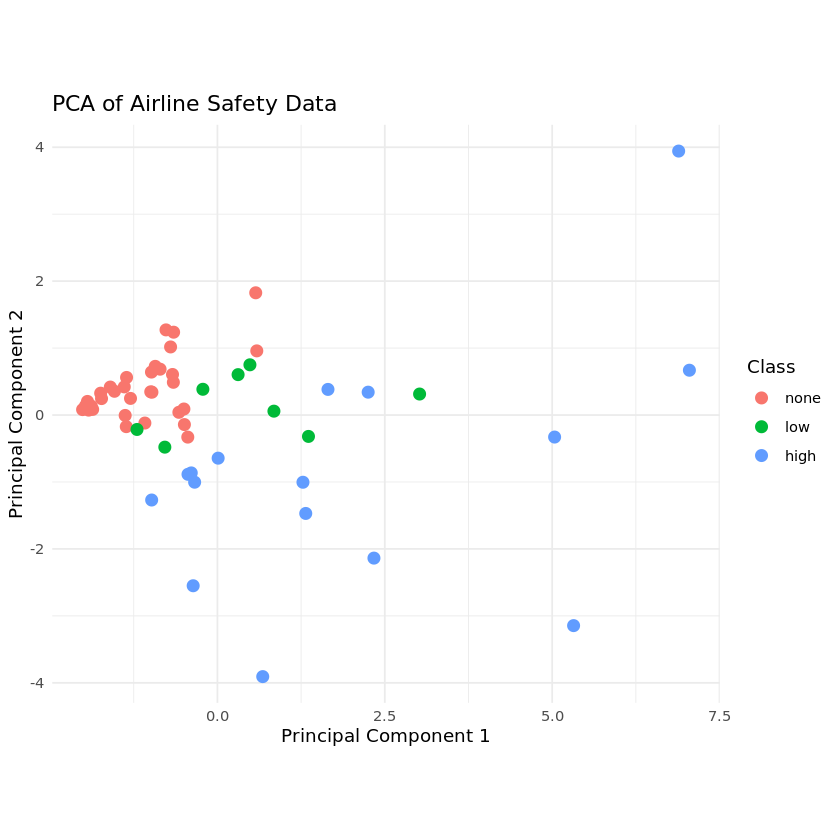

In [22]:
sapply(airline_safety, class)

airline_safety$class <- cut(
    airline_safety$fatalities_00_14,
    breaks = c(-Inf, 0, 50, Inf),
    labels = c("none", "low", "high")
)

airline_safety$class <- as.factor(airline_safety$class)

sapply(
    airline_safety[ , sapply(airline_safety, is.numeric)],
    function(x) {
        c(
            Mean = mean(x),
            SD   = sd(x),
            Var  = var(x),
            Min  = min(x),
            Max  = max(x)
        )
    }
)

airline_scaled <- airline_safety %>%
    mutate(across(
        .cols = where(is.numeric),
        .fns  = ~ as.numeric(scale(.))
    ))
    
airline_numeric <- airline_scaled %>%
  select(where(is.numeric))   

airline_pca <- prcomp(
    airline_numeric,
    center = FALSE,
    scale. = FALSE
)

summary(airline_pca)

airline_pca$rotation

pc_scores <- as_tibble(airline_pca$x) %>%
  mutate(class = airline_safety$class)

ggplot(pc_scores, aes(x = PC1, y = PC2, color = class)) +
  geom_point(size = 3) +
  labs(
    title = "PCA of Airline Safety Data",
    x = "Principal Component 1",
    y = "Principal Component 2",
    color = "Class"
  ) +
  theme_minimal() +
  coord_fixed()

Analysis Method 2: Clustering

[1] "Running custom mykmeans with k = 3"
K-Means converged after 6 iterations.
[1] "--- Custom mykmeans Results (Cluster Labels) ---"
 [1] 1 3 1 1 1 3 2 1 1 1 1 3 1 2 1 1 2 1 1 3 2 1 3 1 2 1 1 1 2 1 1 2 1 1 3 2 1 1
[39] 1 1 2 1 1 1 1 1 1 3 1 2 3 3 3 1 1 1
[1] "--- Custom mykmeans Results (Cluster Means/Centroids) ---"
# A tibble: 3 × 9
  label avail_seat_km_per_week incidents_85_99 fatal_accidents_85_99
  <int>                  <dbl>           <dbl>                 <dbl>
1     1                 -0.233         -0.366                 -0.480
2     2                 -0.299          0.0291                 0.322
3     3                  1.14           1.29                   1.41 
# ℹ 5 more variables: fatalities_85_99 <dbl>, incidents_00_14 <dbl>,
#   fatal_accidents_00_14 <dbl>, fatalities_00_14 <dbl>, total_incidents <dbl>
[1] "\n--- RESULTS FROM R's BUILT-IN kmeans ---"
[1] "Cluster Labels (R's kmeans):"
 [1] 1 3 1 1 1 2 2 1 1 1 1 3 1 1 1 1 2 1 1 3 2 1 2 1 2 1 1 1 1 2 1 2 1 1 2 2 1 1
[39]

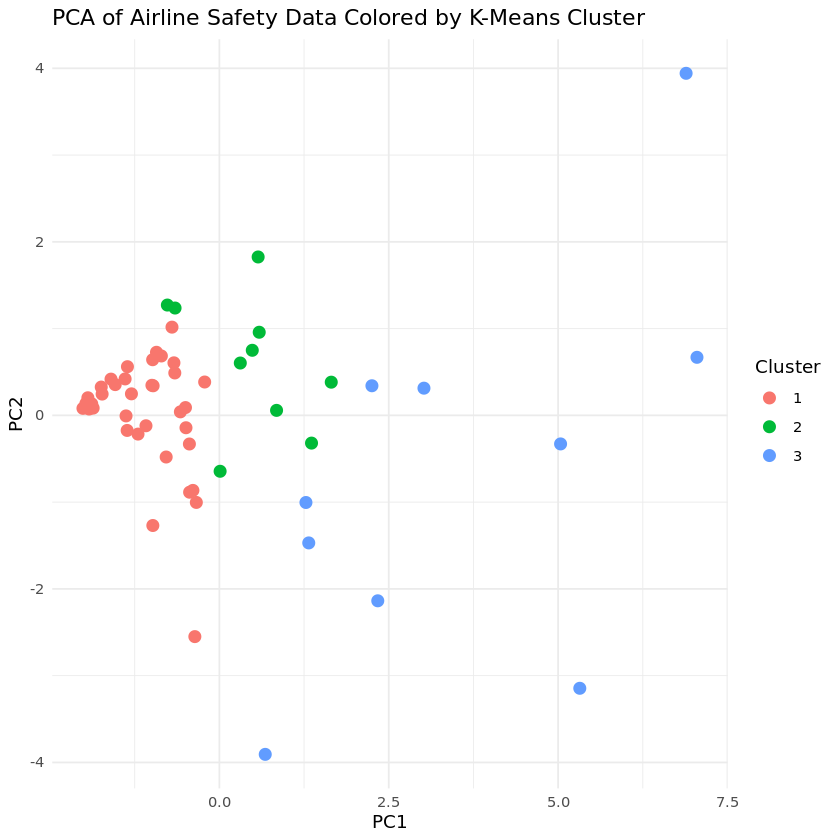

In [23]:
airline_numeric <- airline_scaled %>%
  select(where(is.numeric))   

label_randomly <- function(n_points, n_clusters){
  sample(1:n_clusters, size = n_points, replace = TRUE)
}

get_cluster_means <- function(data, labels){
  data %>%
    mutate(label__ = labels) %>%
    group_by(label__) %>%
    summarize(across(
      .cols = where(is.numeric),
      .fns  = mean,
      .names = "{.col}"
    )) %>%
    rename(label = label__) %>%
    ungroup() %>%
    arrange(label)
}

assign_cluster <- function(data, means){

  X <- as.matrix(data)
  C <- as.matrix(means %>% select(-label))

  X_sq <- rowSums(X * X)
  C_sq <- rowSums(C * C)

  dist_sq_matrix <- outer(X_sq, C_sq, FUN = "+") - 2 * (X %*% t(C))

  new_labels <- max.col(-dist_sq_matrix)

  return(new_labels)
}

kmeans_done <- function(old_means, new_means, eps = 1e-6){
  om <- old_means %>% select(-label) %>% as.matrix()
  nm <- new_means %>% select(-label) %>% as.matrix()

  distances <- sqrt(rowSums((om - nm)^2))

  mean(distances) < eps
}

mykmeans <- function(data, n_clusters, eps = 1e-6, max_iter = 100){

  labels <- label_randomly(nrow(data), n_clusters)

  old_means <- get_cluster_means(data, labels)

  done <- FALSE
  iter <- 0

  while (!done && iter < max_iter){

    labels <- assign_cluster(data, old_means)

    new_means <- get_cluster_means(data, labels)

    if (kmeans_done(old_means, new_means, eps)){
      done <- TRUE
    }

    old_means <- new_means
    iter <- iter + 1
  }

  if (iter == max_iter && !done) {
    warning("K-Means did not converge within the maximum number of iterations.")
  }

  cat(paste("K-Means converged after", iter, "iterations.\n"))

  return(list(labels = labels, means = new_means))
}

n_clusters <- 3

print(paste("Running custom mykmeans with k =", n_clusters))

my_results <- mykmeans(airline_numeric, n_clusters)

print("--- Custom mykmeans Results (Cluster Labels) ---")
print(my_results$labels)

print("--- Custom mykmeans Results (Cluster Means/Centroids) ---")
print(my_results$means)

airline_matrix <- as.matrix(airline_numeric)

print("\n--- RESULTS FROM R's BUILT-IN kmeans ---")

r_results <- stats::kmeans(airline_matrix, centers = n_clusters, nstart = 25)

print("Cluster Labels (R's kmeans):")
print(r_results$cluster)

print("Cluster Means (R's kmeans):")
print(r_results$centers)

pc_cluster_plot <- pc_scores %>%
  mutate(cluster = as.factor(my_results$labels))

ggplot(pc_cluster_plot, aes(PC1, PC2, color = cluster)) +
  geom_point(size = 3) +
  labs(
    title = "PCA of Airline Safety Data Colored by K-Means Cluster",
    color = "Cluster"
  ) +
  theme_minimal()

Analysis Method 3: Classification/Regression

Rows: 56
Columns: 8
$ avail_seat_km_per_week <dbl> -0.7259280, -0.1275826, -0.6816394, -0.5375967,…
$ incidents_85_99        <dbl> -0.46925812, 6.23627861, -0.10679668, -0.378642…
$ fatal_accidents_85_99  <dbl> -0.76145372, 4.13182264, -0.76145372, -0.411933…
$ fatalities_85_99       <dbl> -0.76630896, 0.10627287, -0.76630896, -0.330018…
$ incidents_00_14        <dbl> -0.90759530, 0.41254332, -0.68757220, 0.1925202…
$ fatal_accidents_00_14  <dbl> -0.7694501, 0.3951230, -0.7694501, -0.7694501, …
$ fatalities_00_14       <dbl> -0.49866599, 0.29175730, -0.49866599, -0.498665…
$ total_incidents        <dbl> -0.68798457, 5.22789039, -0.31824238, -0.244293…


 avail_seat_km_per_week incidents_85_99    fatal_accidents_85_99
 Min.   :-0.7679        Min.   :-0.65049   Min.   :-0.7615      
 1st Qu.:-0.6214        1st Qu.:-0.46926   1st Qu.:-0.7615      
 Median :-0.3970        Median :-0.28803   Median :-0.4119      
 Mean   : 0.0000        Mean   : 0.00000   Mean   : 0.0000      
 3rd Qu.: 0.3157        3rd Qu.: 0.07443   3rd Qu.: 0.2871      
 Max.   : 3.9273        Max.   : 6.23628   Max.   : 4.1318      
 fatalities_85_99  incidents_00_14   fatal_accidents_00_14 fatalities_00_14 
 Min.   :-0.7663   Min.   :-0.9076   Min.   :-0.7695       Min.   :-0.4987  
 1st Qu.:-0.7663   1st Qu.:-0.6876   1st Qu.:-0.7695       1st Qu.:-0.4987  
 Median :-0.4357   Median :-0.2475   Median :-0.7695       Median :-0.4987  
 Mean   : 0.0000   Mean   : 0.0000   Mean   : 0.0000       Mean   : 0.0000  
 3rd Qu.: 0.4897   3rd Qu.: 0.2475   3rd Qu.: 0.3951       3rd Qu.: 0.2491  
 Max.   : 2.8808   Max.   : 4.3730   Max.   : 2.7243       Max.   : 4.3247  
 total


Call:
lm(formula = f, data = d %>% filter(train))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.69534 -0.19062 -0.07417  0.12749  0.82468 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)   
(Intercept)            -0.04264    0.05525  -0.772  0.44540   
avail_seat_km_per_week  0.18559    0.06571   2.824  0.00777 **
fatal_accidents_85_99   0.44669    0.13185   3.388  0.00175 **
fatalities_85_99       -0.02005    0.06732  -0.298  0.76755   
fatal_accidents_00_14   0.27089    0.08881   3.050  0.00434 **
fatalities_00_14       -0.08698    0.07182  -1.211  0.23396   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3282 on 35 degrees of freedom
Multiple R-squared:  0.7709,	Adjusted R-squared:  0.7381 
F-statistic: 23.55 on 5 and 35 DF,  p-value: 2.678e-10


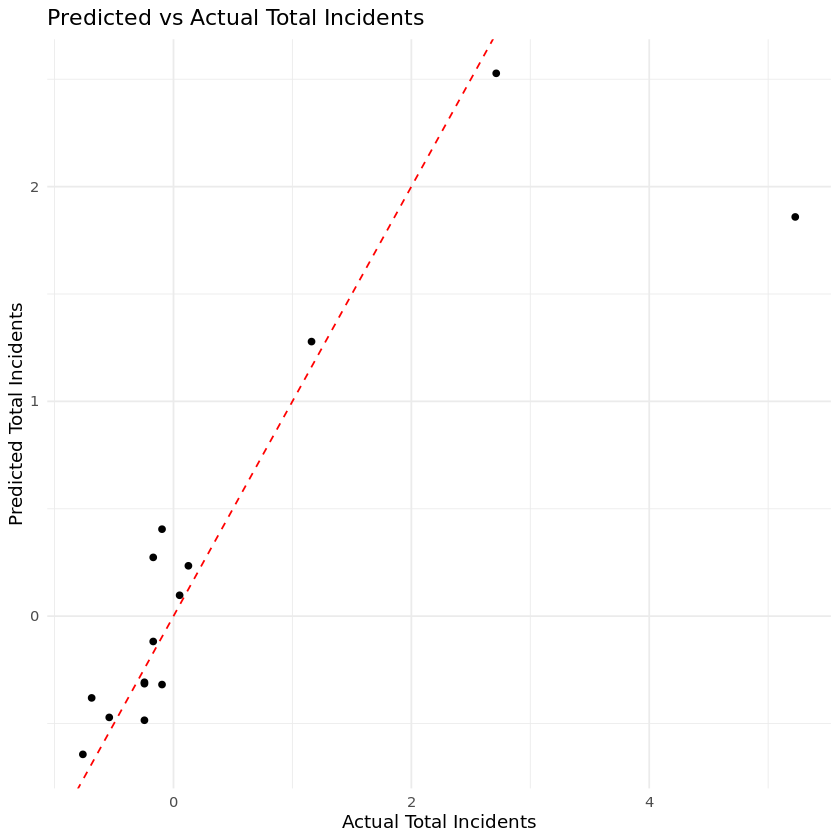

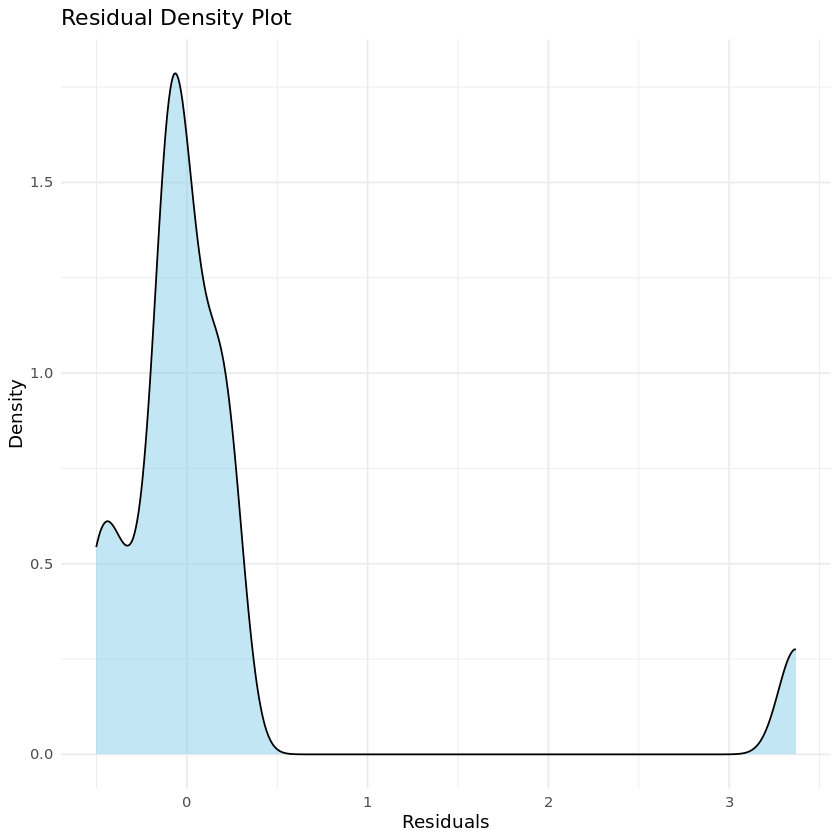

In [24]:
d <- airline_numeric

glimpse(d)
summary(d)

set.seed(123)
train <- runif(nrow(d)) < 0.75
test <- !train

f <- total_incidents ~ avail_seat_km_per_week +
                       fatal_accidents_85_99 +
                       fatalities_85_99 +
                       fatal_accidents_00_14 +
                       fatalities_00_14

m <- lm(f, data = d %>% filter(train))
summary(m)

dx <- d %>% filter(test)
dx <- dx %>% mutate(total_incidents_pred = predict(m, dx))

ggplot(dx, aes(x = total_incidents, y = total_incidents_pred)) +
  geom_point() +
  geom_abline(slope = 1, intercept = 0, linetype="dashed", color="red") +
  labs(x = "Actual Total Incidents", y = "Predicted Total Incidents",
       title = "Predicted vs Actual Total Incidents") +
  theme_minimal()

ggplot(dx, aes(x = total_incidents - total_incidents_pred)) +
  geom_density(fill = "skyblue", alpha = 0.5) +
  labs(x = "Residuals", y = "Density", title = "Residual Density Plot") +
  theme_minimal()


High vs. Low Risk Prediction

In [27]:
install.packages("glmnet")
library(glmnet)

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)



[1] 0.000147769

8 x 1 sparse Matrix of class "dgCMatrix"
                               s1
(Intercept)            -0.7118349
avail_seat_km_per_week  0.8971479
incidents_85_99         1.7607994
fatal_accidents_85_99   .        
fatalities_85_99       -3.0961270
incidents_00_14         .        
fatal_accidents_00_14   0.1217560
fatalities_00_14       17.3776756

         Actual
Predicted  0  1
        0 13  1
        1  0  1

[1] 0.9333333

Installing package into ‘/srv/rlibs’
(as ‘lib’ is unspecified)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



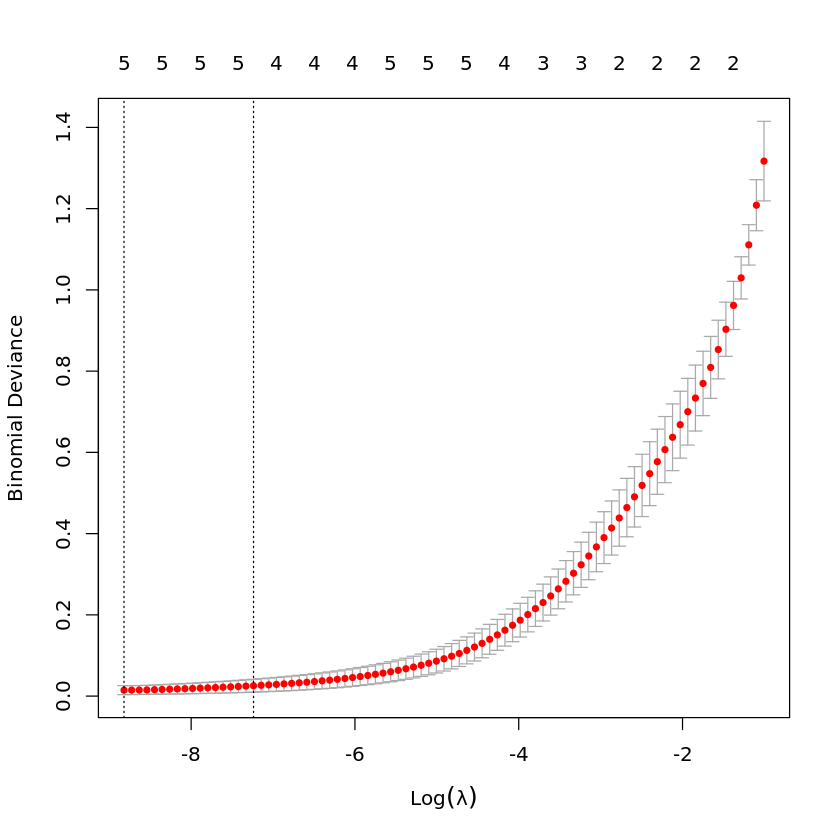

Area under the curve: 1

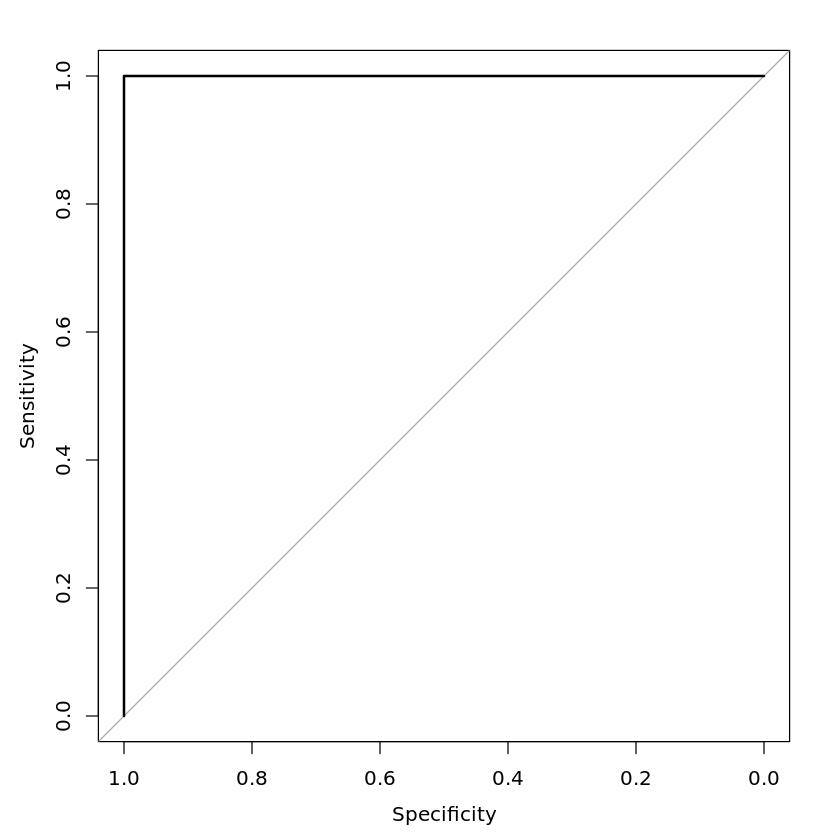

In [28]:
airline_scaled <- airline_scaled %>%
  mutate(high_risk = ifelse(class == "high", 1, 0))

set.seed(123)
train_idx <- runif(nrow(airline_scaled)) < 0.75
train <- airline_scaled[train_idx, ]
test  <- airline_scaled[!train_idx, ]

predictors <- c(
  "avail_seat_km_per_week",
  "incidents_85_99",
  "fatal_accidents_85_99",
  "fatalities_85_99",
  "incidents_00_14",
  "fatal_accidents_00_14",
  "fatalities_00_14"
)

x_train <- as.matrix(train[, predictors])
y_train <- train$high_risk

x_test  <- as.matrix(test[, predictors])
y_test  <- test$high_risk

set.seed(123)
cv_fit <- cv.glmnet(
  x = x_train,
  y = y_train,
  family = "binomial",
  alpha = 1        
)

plot(cv_fit)

best_lambda <- cv_fit$lambda.min
best_lambda

coef(cv_fit, s = "lambda.min")

pred_prob <- predict(cv_fit, newx = x_test, s = "lambda.min", type = "response")
pred_class <- ifelse(pred_prob > 0.5, 1, 0)

table(Predicted = pred_class, Actual = y_test)

mean(pred_class == y_test)

install.packages("pROC")
library(pROC)

roc_obj <- roc(y_test, as.numeric(pred_prob))
plot(roc_obj)
auc(roc_obj)